# BE 521: Homework 1 Questions

Spring 2024

33 points

Due: Feb 1st, 2024

Objective: Working with the IEEG Portal to explore different Neural Signals.

## Collaborator: Yuanchao Zhang & Zhiyu Kuang

## 1. Seizure Activity (16 pts)

The dataset I521_A0001_D002 contains an example of human intracranial EEG (iEEG) data displaying seizure activity. It is recorded from a single channel (2 electrode contacts) implanted in the hippocampus of a patient with temporal lobe epilepsy being evaluated for surgery. In these patients, brain tissue where
seizures are seen is often resected. You will do multiple comparisons with this iEEG data and the unit activity that you worked with in Homework 0 (I521_A0001_D001). You will have to refer to that homework and/or dataset for these questions.

In [5]:
#Set up the notebook environment
!pip install git+https://github.com/ieeg-portal/ieegpy.git # Install ieegpy toolbox directly from github
from ieeg.auth import Session
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal as sig

  Cloning https://github.com/ieeg-portal/ieegpy.git to /tmp/pip-req-build-vvb58agh
  Running command git clone --filter=blob:none --quiet https://github.com/ieeg-portal/ieegpy.git /tmp/pip-req-build-vvb58agh
  Resolved https://github.com/ieeg-portal/ieegpy.git to commit 080bfa42a8503380ef164b5e7b116613f75073bb
  Preparing metadata (setup.py) ... done


### 1
Retrieve the dataset using the IEEGToolbox and generate a session variable as before (nno need to report the output this time). What is the sampling rate of this data? What is the maximum frequency of the signal content that we can resolve? (2 pts)

In [6]:
# My code here
# open the binary file and use its content to create a session frmo IEEG
with open('/content/Yua_ieeglogin.bin', 'r') as f:
  session = Session('Yuanchz1118', f.read())

# get the specified dataset from IEEG
dataset = session.open_dataset('I521_A0001_D002')

label = dataset.get_channel_labels()
index = dataset.get_channel_indices(label)
timeseries = dataset.get_time_series_details(label[0])
print(timeseries, "\n")
sample_rate = timeseries.sample_rate
print("Smpling rate of this data:",sample_rate, "Hz", "\n")

start_time = timeseries.start_time
end_time = timeseries.end_time
max_freq = sample_rate / 2
print("According to Nyquist Frequency: The maximum frequency of the signal content is", max_freq, "Hz")

None(seizure) spans 644995000.0 usec, range [-2216-2221] in 129000 samples. Starts @1 uUTC, ends @644995001 uUTC with sample rate 200.0 Hz and voltage conv factor 1.0 

Smpling rate of this data: 200.0 Hz 

According to Nyquist Frequency: The maximum frequency of the signal content is 100.0 Hz


**My Answer Here:**

The sampling rate of this data is **200.0 Hz**.

The maximum frequency of the signal content we can solve should be **100.0 Hz**.

### 2
How does the duration of this recording compare with the recording from HW0 (I521_A0001_D001)? (2 pts)

In [7]:
# My code here
duration = (end_time - start_time) / 10**6
print("Duration of this recording:", duration, "seconds")

Duration of this recording: 644.995 seconds


**My Answer Here:**

**The duration of this recording from HW1 is 634.995 seconds longer than the recording from HW0.**

### 3
Using the time-series visualization functionality of the IEEG Portal, provide a plot of the first 500 ms of data from this recording. (2 pts)

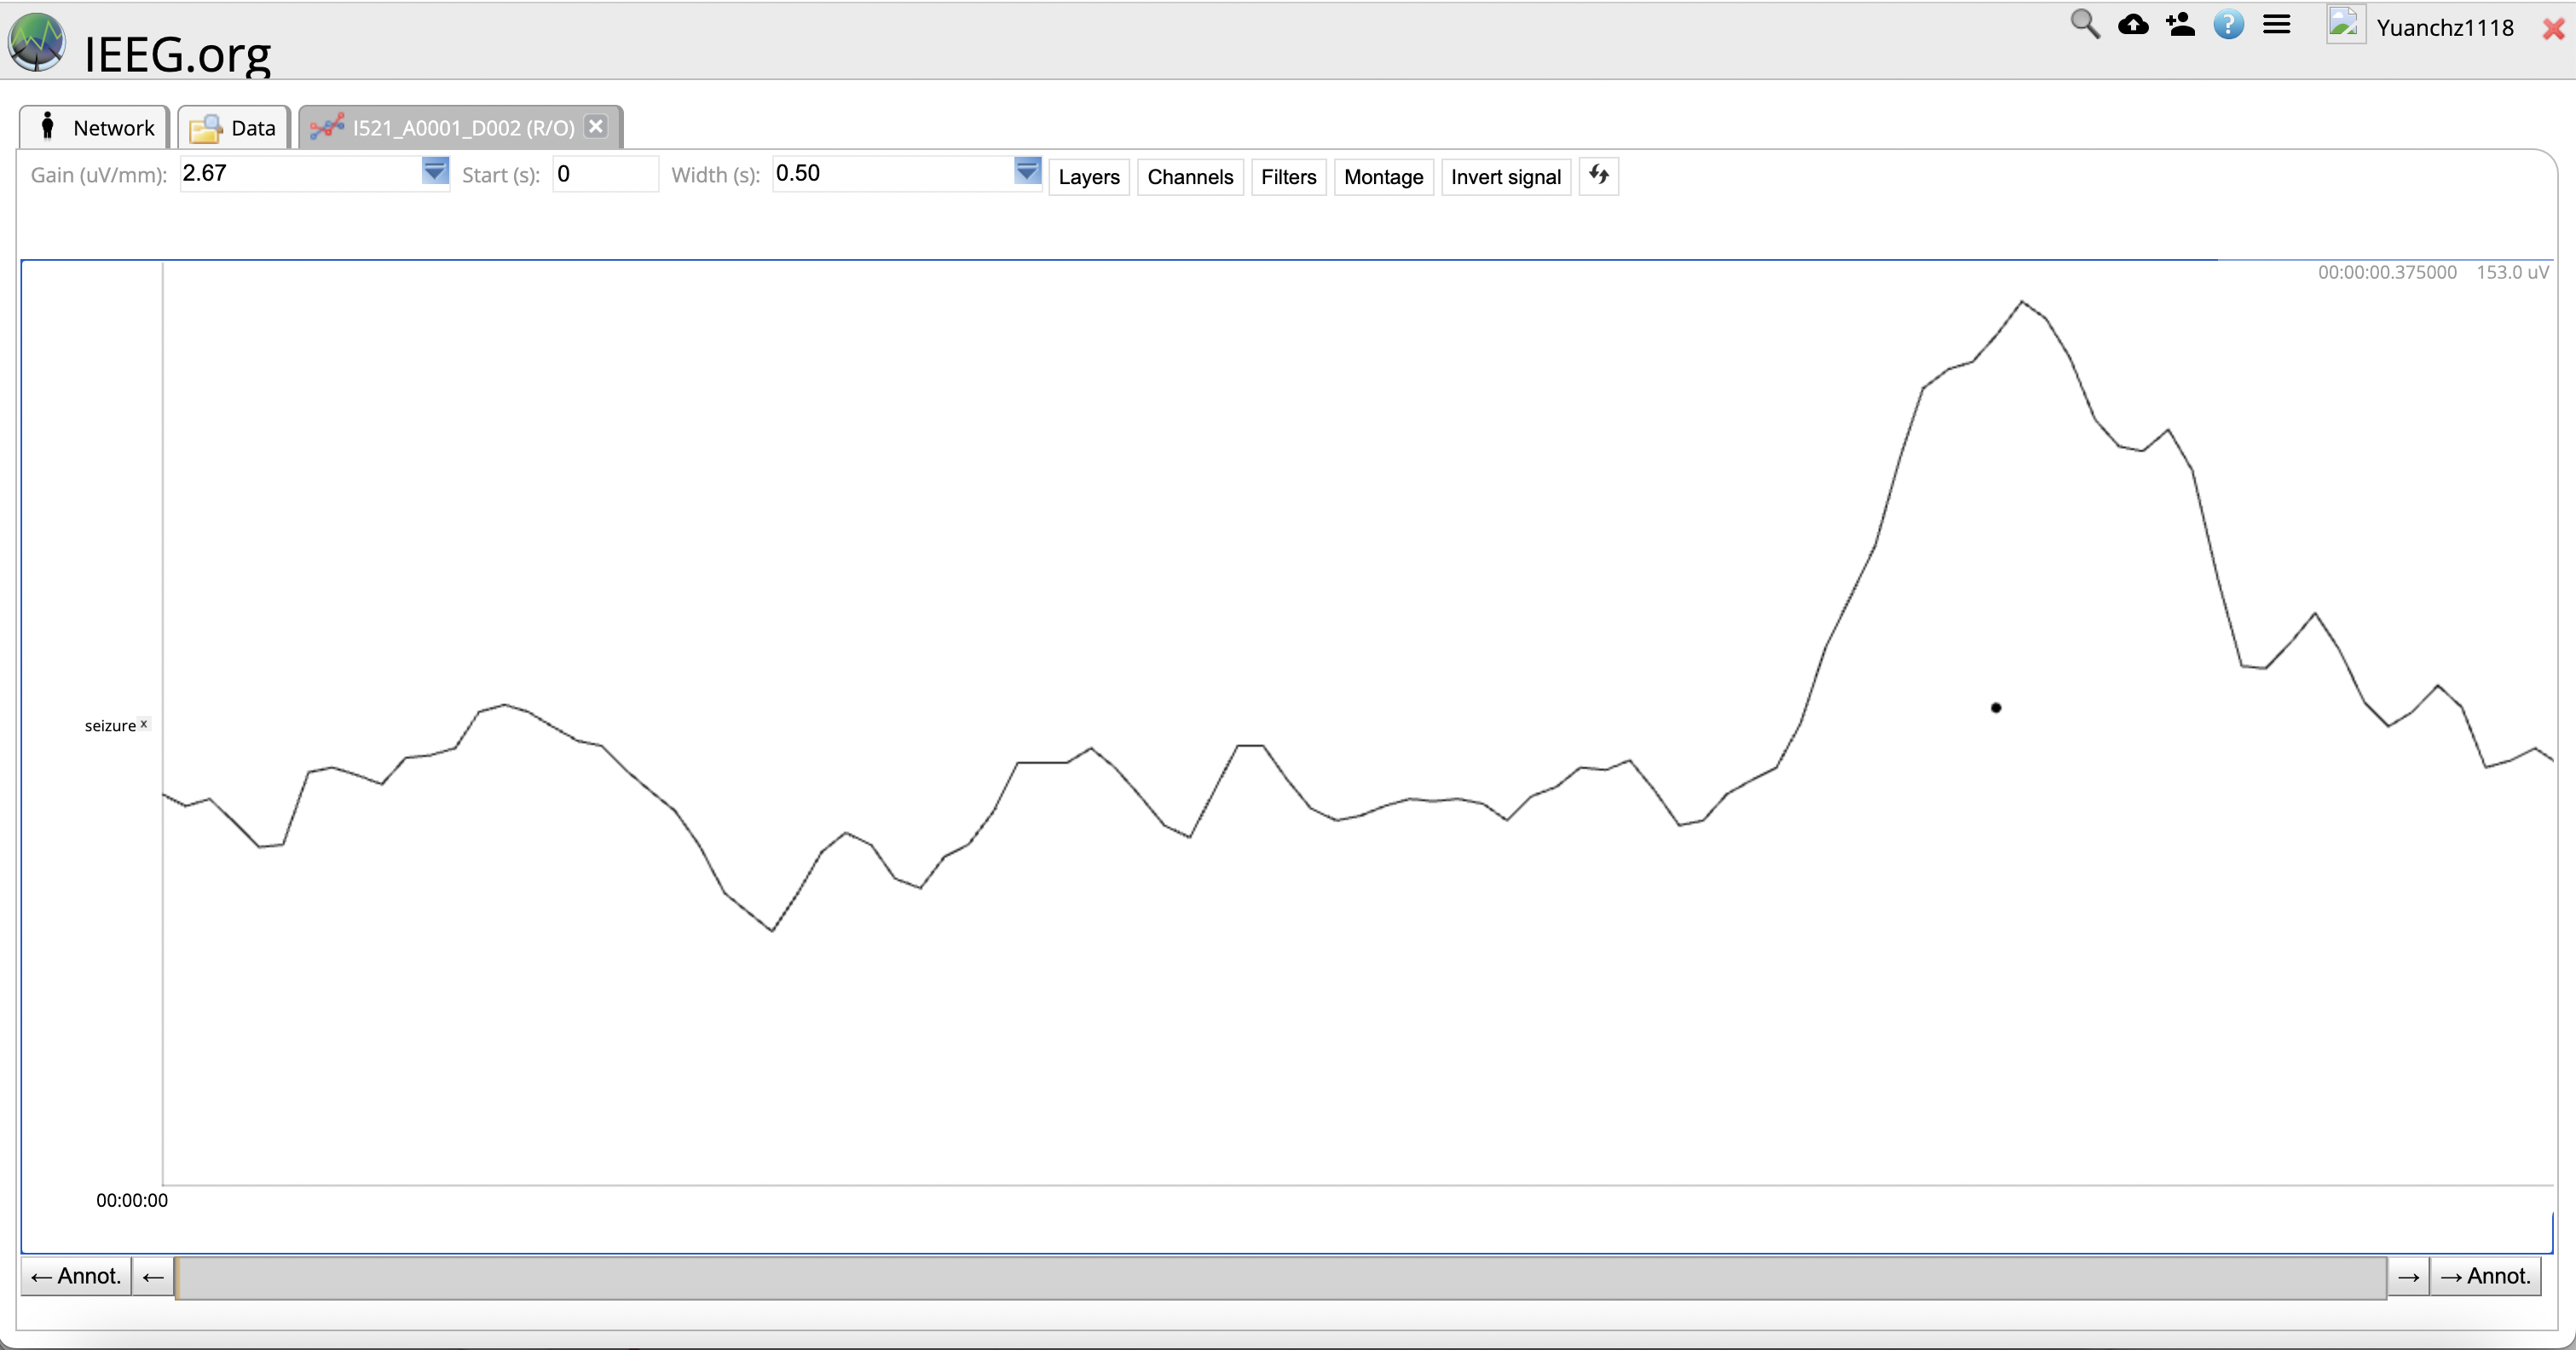

### 4
Compare the activity in this sample with the data from HW0. What differences do you notice in the amplitude and frequency characteristics? (2 pts)

**My Answer Here:**

In general, **amplitude** in this sample from **HW1** is **greater** than amplituede of data from HW0.

On the contrary, **frequency** in this sample from **HW1** is **smaller** than frequency data from HW0.

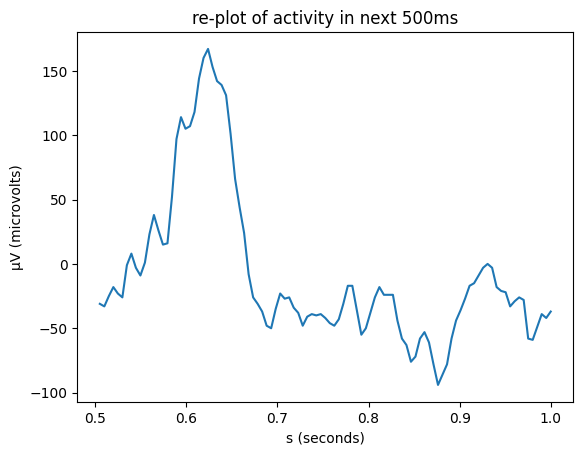

In [8]:
# My code here
time_tmp = start_time + 500*1000
time_diff = time_tmp / 10**6 - start_time

freq_tmp = dataset.get_data(start_time, time_tmp, index)
time_range = np.arange(start_time, time_tmp / 10**6, time_diff / len(freq_tmp))
plt.plot(time_range, freq_tmp)
plt.xlabel('s (seconds)')
plt.ylabel('μV (microvolts)')
plt.title("re-plot of activity in next 500ms")
plt.show()

### 5
The unit activity sample in (I521_A0001_D001) was high-pass filtered to remove low-frequency content. Assume that the seizure activity in (I521_A0001_D002) has not been high-pass filtered. Given that the power of a frequency band scales roughly as $1/f$, how might these di
erences in preprocessing contribute to the differences you noted in the previous question? (There is no need to get into specific calculations here. We just want general ideas.) (3 pts)

**My Answer Here:**

The unit activity sample 'units' in (I521_A0001_D001) has been subjected to high-pass filtering, eliminating low-frequency signals and highlighting greater frequencies. 'Seizures' in (I521_A0001_D002), however, have not undergone high-pass filtering, allowing a more comprehensive range of frequency components, especially low-frequency signals, to be preserved with greater amplitude. This variation in preprocessing affects how power is distributed throughout frequency bands.

Low-frequency contributions might be attenuated by the high-pass filtering, which could affect how slower oscillations or baseline brain activity are represented. On the other hand, the lack of filtering (I521_A0001_D002) enables a more inclusive depiction of both slow and fast components. Various preprocessing differences should be taken into account when assessing and comparing results across multiple datasets, especially when it comes to the interpretation of neuronal dynamics and seizure detection.

### 6
Two common methods of human iEEG are known as electrocorticography (ECoG) and stereoelectroencephalography (SEEG). For either of these paradigms (please indicate which you choose), find and report at least two of the following electrode characteristics: shape, material, size. Please note that exact numbers aren't required, and please cite any sources used. (3 pts)

**My Answer Here:**

**[1] Electrocorticography (ECoG):** Disc-shaped or grid-shaped electrodes prevail in human intracranial EEG recordings. They are usually constructed from biocompatible materials like platinum or stainless steel to guarantee long-term stability. These electrodes come in different sizes, which affects spatial resolution, but **usually several mm(Recitation 2).**



**Reference:**

**[1]** E. C. Leuthardt et al., "The emerging world of motor neuroprosthetics: a neurosurgical perspective," Front. Neuroeng., vol. 7, p. 8, Apr. 16, 2014, doi: 10.3389/fneng.2014.00008.

### 7
What is a local field potential? How might the characteristics of human iEEG electrodes cause them to record local field potentials as opposed to multiunit activity, which was the signal featured in HW0 as recorded from 40 micron Pt-Ir microwire electrodes? (2 pts)

**My Answer Here:**

[1] The local field potential is known as the summed activity of 1000 neurons recorded by ECoG electrodes on the brain surface. The signal featureed in HWO belongs to the multiunit activity, because its signal frequency and special material made of metal which is inserted into tissue.

[1] Samuel P. Burns, Dajun Xing, Robert M. Shapley, Comparisons of the Dynamics of Local Field Potential and Multiunit Activity Signals in Macaque Visual Cortex, Journal of Neuroscience 13 October 2010, 30 (41) 13739-13749; DOI: 10.1523/JNEUROSCI.0743-10.2010

## 2. Evoked Potentials (17 pts)

The data in I521 A0001 D003 contains an example of a very common type of experiment and neuronal signal, the evoked potential (EP). The data show the response of the whisker barrel cortex region of rat brain to an air puff stimulation of the whiskers. The stim channel shows the stimulation pattern, where the falling edge of the stimulus indicates the start of the air puff, and the rising edge indicates the end. The ep channel shows the corresponding evoked potential. Once again, play around with the data on the IEEG Portal, in particular paying attention to the effects of stimulation on EPs. You should observe the data with window widths of 60 secs as well as 1 sec. Again, be sure to explore the signal gain to get a more accurate picture. Finally, get a sense for how long the trials are (a constant duration), and how long the entire set of stimuli and responses are.

### 1
Based on your observations, should we use all of the data or omit some of it? (There's no right answer, here, just make your case either way in a few sentences.) (2 pts)

**My Answer Here:**

**From my perspective, let's omit some abnormal signals from the entire dataset.**

Combined with observing neuronal signals from I521 A0001 D003 and **Reading 2 Discussion material "Spacelabs Medical"**: Evoked Potential Amplitude from the provided dataset always disorderedly fluctuates due to noises, the effective intensity of eliciting stimuli might cause such abnormal variations. Furthermore, technical challenges impede scientists from recording evoked potentials and arousing amplitude abnormalities. Therefore, we should spend more time and energy distinguishing normal and abnormal latency must be appropriately distinguished to satisfy recording requirements. That is, merely a limited amount of variables that occur between normal subjects in the latency of EP should appropriately respond; we are better off omitting some abnormal signals to improve the efficiency and accuracy of EP Amplitude Research.

Furthermore, when I compare observations of window widths of 60 secs and 1 sec, **a window width of 60 secs is relatively redundant.** Thus, we don't need such a wide window to observe signals.

### 2
Retrieve the ep and stim channel data in Colab. What is the average latency (in ms) of the peak response to the stimulus onset over all trials? (Assume stimuli occurs at exactly 1 second intervals.) (3 pts)

Dataframe of the ep and stim channel data:
              ep      stim
0       -1009.30   7208.76
1       -1191.26   2673.00
2       -1144.79   2741.35
3       -1712.43   2874.65
4       -1545.53   2668.89
...          ...       ...
320128 -10983.53  17198.20
320129 -10772.78  17198.20
320130 -10519.93  17198.20
320131 -10997.74  17198.20
320132 -11883.37  17198.20

[320133 rows x 2 columns] 

The average latency (in ms) of the peak: 168.8792818007459 ms



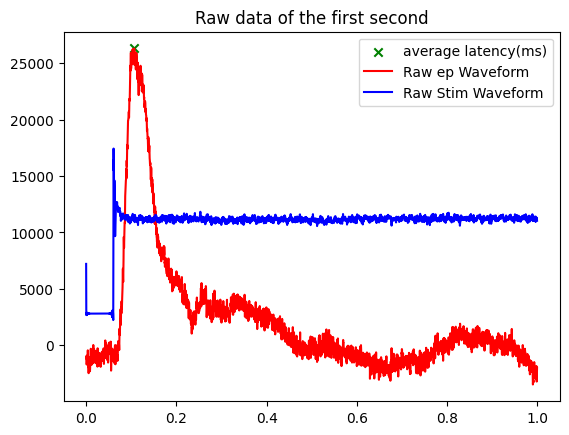

In [20]:
#Your code here
# get the specified dataset from IEEG
dataset_new = session.open_dataset('I521_A0001_D003')
label_new = dataset_new.get_channel_labels()
index_new = dataset_new.get_channel_indices(label_new)
timeseries_ep = dataset_new.get_time_series_details(label_new[0])
timeseries_stim = dataset_new.get_time_series_details(label_new[1])


start_time_ep = timeseries_ep.start_time
end_time_ep = timeseries_ep.end_time
start_time_stim = timeseries_ep.start_time
end_time_stim = timeseries_ep.end_time

duration = timeseries_ep.duration
freq_ep_tmp = dataset_new.get_data(start_time_ep, duration, index_new)
freq_ep = dataset_new.get_dataframe(start_time_ep, duration, index_new)
print("Dataframe of the ep and stim channel data:")
print(freq_ep, "\n")

### I use time to split duration, but floating number exists, thus round up
### I realize sample_rate should be more appropirate
entire_ep = dataset_new.get_data(start_time_ep, duration + 1, [0])
Num_Trials = round(duration/10**6)
#print("Number of trials splitted by time", Num_Trials)
ep_sample_rate = timeseries_ep.sample_rate
Num_Trials_tmp = int(len(entire_ep) / ep_sample_rate)
#print("Number of trials splitted by sample rate", Num_Trials_tmp)

tmp_ep = np.split(entire_ep, Num_Trials)
time_range_new = np.arange(0, 1, 1/tmp_ep[0].shape[0])

n = 0
m = 0
tmp_ep_list = []
#tmp_ep_latency_list = []
#tmp_stim_latency_list = []
total_latency_list = []

ep_data = dataset_new.get_data(start_time_ep, 1000000-1, [0])
entire_ep = dataset_new.get_data(start_time_ep, duration + 1, [0])

#time_range_new = np.arange(start_time_ep, duration+1, 1/len(entire_ep))
stim_data = dataset_new.get_data(start_time_stim, 1000000-1, [1])

for n in range(0, Num_Trials):
  ep_tmp = dataset_new.get_data(start_time_ep + n * 1000000, 1000000-1, [0])
  #stim_tmp = dataset_new.get_data(start_time_stim + n * 1000000, 1000000-1, [1])

  tmp_ep_max = max(ep_tmp)
  #tmp_stim_max = max(stim_tmp)

  ep_tmp_list = ep_tmp.tolist()
  #stim_tmp_list = stim_tmp.tolist()

  #ep_data = dataset_new.get_data(start_time_ep, 1000000-1, [0])
  #stim_data = dataset_new.get_data(start_time_stim, 1000000-1, [1])

  #time_range_new = np.arange(0, 1, 1/len(ep_data))

  ### Use each spike to find out average latency time of each trial
  tmp_ep_max_loc = ep_tmp_list.index(tmp_ep_max)
  #tmp_stim_max_loc = stim_tmp_list.index(tmp_stim_max)

  #tmp_max_time = tmp_ep_max_loc / len(ep_tmp)
  tmp_ep_latency = time_range_new[tmp_ep_max_loc]
  #tmp_stim_latency = time_range_new[tmp_stim_max_loc]

  #total_latency = tmp_ep_latency - tmp_stim_latency
  #tmp_ep_latency_list.append(tmp_ep_latency)
  #tmp_stim_latency_list.append(tmp_stim_latency)
  total_latency_list.append(tmp_ep_latency)
  n = n + 1

avg_latency = sum(total_latency_list) / len(total_latency_list)

print("The average latency (in ms) of the peak:", avg_latency * 1000, "ms\n")

data_max_ep = max(ep_data)

ep_data_list = ep_data.tolist()
stim_data_list = stim_data.tolist()

max_ep_loc = ep_data_list.index(data_max_ep)
data_max_time = max_ep_loc / len(ep_data)

i = 0
first_ep_list = []
first_stim_list = []

for i in range(0, len(ep_data)):
  first_ep_list.append(ep_data[i][0])
  first_stim_list.append(stim_data[i][0])
  i = i + 1


plt.title("Raw data of the first second")
plt.scatter(data_max_time, data_max_ep, marker = 'x', color = 'green', label = "average latency(ms)")
plt.plot(time_range_new, first_ep_list, color = "red", label = "Raw ep Waveform")
plt.plot(time_range_new, first_stim_list, color = "blue", label = "Raw Stim Waveform")
plt.legend(loc='upper right')
plt.show()

**My Answer Here:**

The average latency (in ms) of the peak is **168.8792818007459 ms**

### 3
In neuroscience, we often need to isolate a small neural signal buried under an appreciable amount of noise. One technique to accomplish this is called the "spike triggered average", sometimes called "signal averaging". This technique assumes that the neural response to a repetitive stimulus is constant (or nearly so), while the noise fluctuates from trial to trial - therefore averaging the evoked response over many trials will isolate the signal and average out the noise. Construct a spike triggered average plot for the data in I521 A0001 D003. Plot the average EP in red. Overlay the standard deviation of the responses in grey.
You may find [`plt.fill_between`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html) and [`np.linspace`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) to be helpful. Be sure to include an informative legend. You may also find [this](https://matplotlib.org/stable/gallery/color/named_colors.html) to be helpful for what colors plyplot natively supports (4 pts).

(2713,)
The average latency (in ms) of the peak: 134.537412458533 ms 



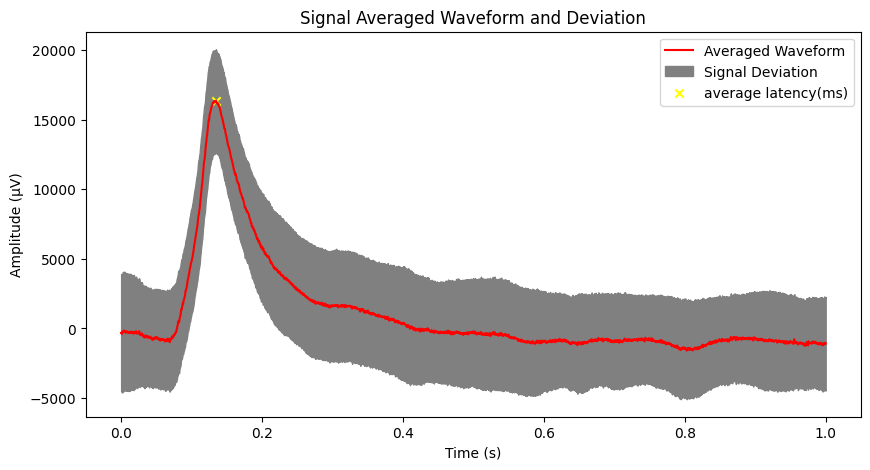

In [16]:
# My code here
### I use time to split duration, but floating number exists, thus round up
### I realize sample_rate should be more appropirate
entire_ep = dataset_new.get_data(start_time_ep, duration + 1, [0])
Num_Trials = round(duration/10**6)
#print("Number of trials splitted by time", Num_Trials)
ep_sample_rate = timeseries_ep.sample_rate
#Num_Trials_tmp = int(len(entire_ep) / ep_sample_rate)
#print("Number of trials splitted by sample rate", Num_Trials_tmp)
stim_entire = dataset_new.get_data(start_time_stim, duration + 1, [1])

n = 0
m = 0
tmp_latency_list = []
avg_ep_list = []

tmp_ep = np.split(entire_ep, Num_Trials)

time_range_new = np.arange(0, 1, 1/tmp_ep[0].shape[0])
print(time_range_new.shape)

Matrix_Array = np.zeros((int(ep_sample_rate), 1))

for n in range(0, Num_Trials):

  Matrix_Array = np.concatenate((Matrix_Array, tmp_ep[n]), axis=1)
  n = n + 1

Matrix_Array = np.delete(Matrix_Array,0,axis=1)
Matrix_Mean = np.mean(Matrix_Array, axis = 1)
Matrix_Std = np.std(Matrix_Array, axis = 1)

Mean_Above = Matrix_Mean + 1/2 * Matrix_Std
Mean_Below = Matrix_Mean - 1/2 * Matrix_Std

Matrix_Mean_List = Matrix_Mean.tolist()
Max_Mean = max(Matrix_Mean_List)
Max_index = Matrix_Mean_List.index(Max_Mean)
Max_Time = time_range_new[Max_index]

print("The average latency (in ms) of the peak:", Max_Time * 1000, "ms", "\n")
plt.figure(figsize = (10,5))
plt.title("Signal Averaged Waveform and Deviation")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (μV)')
plt.plot(time_range_new, Matrix_Mean, color = "red", label = "Averaged Waveform")

### Plot of Stim Waveform isn't included in question requirement, but you can also test my plot here
plt.fill_between(time_range_new, Mean_Above, Mean_Below, color = "grey", label = "Signal Deviation")
plt.scatter(Max_Time, Max_Mean, marker = 'x', color = 'yellow', label = "average latency(ms)")
plt.legend(loc = 'upper right')
plt.show()

### 4.


####4a
We often want to get a sense for the amplitude of the noise in a single trial. Propose a method to do this (there are a few reasonably simple methods, so no need to get too complicated). Note: do not assume that the signal averaged EP is the "true" signal and just subtract it from that of each
trial, because whatever method you propose should be able to work on the signal from a single trial or from the average of the trials. (4 pts)

**My Answer Here:**

I want to apply a Fast Fourier Transform (FFT) on the evoked potential (EP) signal to convert it from the time domain to the frequency domain to estimate the noise amplitude in a single trial. When I simulate the performances of several different filters using a Low Pass Filter and reduce their high cutoff frequency, I find a smoother plot but still noticeable noises for my future experiment, proving the amplitude of the noises decreases. On the contrary, when I try a High Pass Filter and increase its low cutoff frequency, I find a frequently fluctuating plot with many noises; thus, the amplitude of the noises increases.

**[1]** For the scientific method for calculating amplitude, I self-learn from reference that the RMS measures the total variability of the signal, considering both the signal and noise components. This technique helps identify noisy trials and applies to individual trials. However, I need to spend more time understanding how I can use this method in my coding and accurately give answers to questions starting from 4c, but I have tried my best to calculate the mean noise amplitude with my programming skills.

**[2]** Because it is tangible and clear, the RMS amplitude is typically utilized for complex waveforms, particularly for non-repeating signals like noise.

**Reference:**

**[1]** ScienceDirect. "Signal Averaging," ScienceDirect. [Online]. Available: https://www.sciencedirect.com/topics/computer-science/signal-averaging

**[2]** Wikipedia, The Free Encyclopedia. [Online]. Available: https://en.wikipedia.org/wiki/Amplitude#Root_mean_square_amplitude

#### 4b
Show with a few of the EPs (plots and/or otherwise) that your method gives reasonable results. You may find [`sig.butter`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html) and [`sig.filtfilt`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.filtfilt.html) helpful. (1 pt)

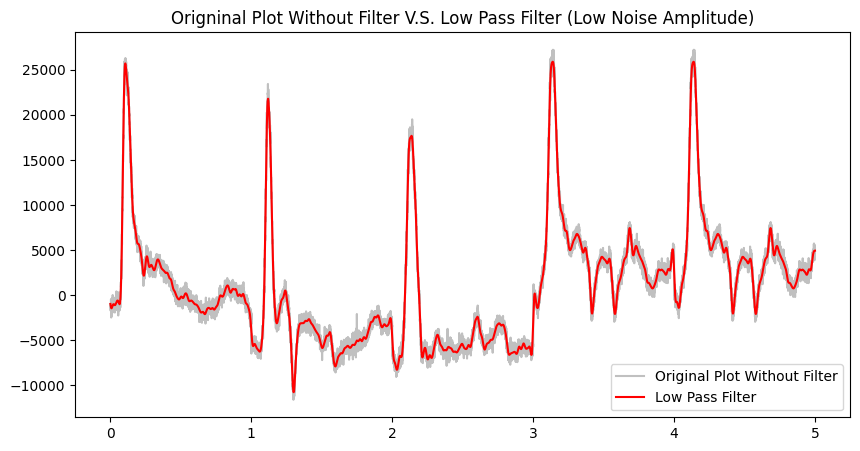

In [21]:
# My code here
new_ep = entire_ep[0:5*int(ep_sample_rate)]
time_range_three = np.arange(0, 5, 5/len(new_ep))

High_Cutoff = 40  # Cut-off frequency of the filter
real_freq = 2 * High_Cutoff / ep_sample_rate # Normalize the frequency
b, a = sig.butter(5, real_freq, 'low')
output = sig.filtfilt(b, a, new_ep, axis = 0, padlen = 15)
plt.figure(figsize = (10,5))
plt.title("Origninal Plot Without Filter V.S. Low Pass Filter (Low Noise Amplitude)")
plt.plot(time_range_three, new_ep, label = 'Original Plot Without Filter', color = "silver")
plt.plot(time_range_three, output, label = 'Low Pass Filter', color = "red")
plt.legend()
plt.show()

**My Answer Here:**

When I simulate the performances of several different filters using a Low Pass Filter and reduce their high cutoff frequency, I find a smoother plot but still noticeable noises for my future experiment, proving the amplitude of the noises decreases.

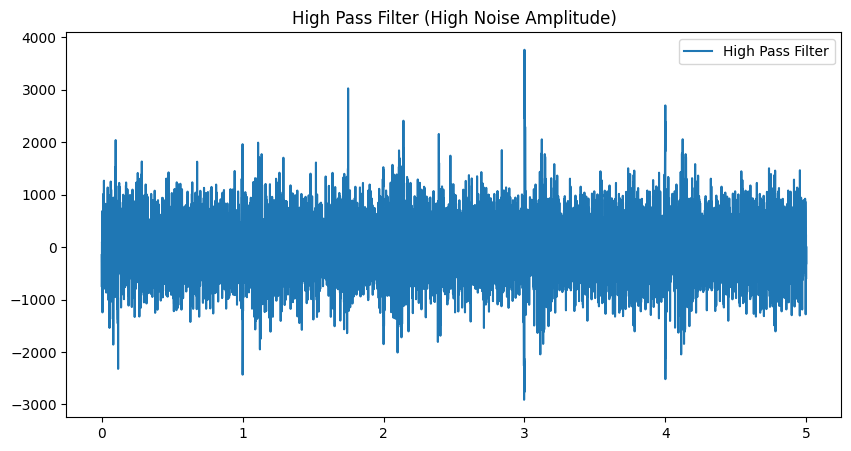

In [22]:
# My code here
Low_Cutoff = 30  # Cut-off frequency of the filter
Low_real_freq = 2 * Low_Cutoff / ep_sample_rate # Normalize the frequency
high_b, high_a = sig.butter(5, Low_real_freq, 'high')
output_high = sig.filtfilt(high_b, high_a, new_ep, axis = 0, padlen = 15)
plt.figure(figsize = (10,5))
plt.title("High Pass Filter (High Noise Amplitude)")
plt.plot(time_range_three, output_high, label='High Pass Filter')
plt.legend()
plt.show()

**My Answer Here:**

when I try a High Pass Filter and increase its low cutoff frequency, I find a frequently fluctuating plot with many noises; thus, the amplitude of the noises increases.

#### 4c
Apply your method on each individual trial and report the mean noise amplitude across all trials. (1 pt)

In [23]:
# My code here
x = 0
output_array = np.zeros((int(ep_sample_rate), 1))

for x in range(1, Num_Trials):
  # Apply my method on each individual trial
  ep_loop = entire_ep[(x-1)*int(ep_sample_rate):x*int(ep_sample_rate)]
  output_loop = sig.filtfilt(high_b, high_a, ep_loop, axis = 0, padlen = 0)
  output_array = np.concatenate((output_array, output_loop), axis=1)

output_array = np.delete(output_array,0,axis=1)
#Output_Mean = np.mean(abs(output_array), axis = 1)
#Noise_Mean = sum(Output_Mean) / len(Output_Mean)

Noise_Mean = np.sqrt(np.mean(output_array**2))
print("The mean noise amplitude across all trials:", Noise_Mean, 'μV')
#plt.plot(time_range_new, output_loop_list, label='High Pass Filter')

The mean noise amplitude across all trials: 502.7049384026724 μV


**My Answer Here:**

The mean noise amplitude across all trials is **502.7049384026724 μV**.

#### 4d
Apply your method on the signal averaged EP and report its noise. (1 pt)

In [24]:
# My code here
avg_ep_output = sig.filtfilt(high_b, high_a, Matrix_Mean, axis = 0, padlen = 0)
avg_noise_mean = np.sqrt(np.mean(avg_ep_output**2))
print("The mean noise amplitude on the signal averaged EP:", avg_noise_mean, 'μV')

The mean noise amplitude on the signal averaged EP: 62.73364822374175 μV


**My Answer Here:**

The mean noise amplitude on the signal averaged EP: **62.73364822374175 μV.**

#### 4e
Do these two values make sense? Explain. (1 pt)

**My Answer Here:**

Differences between these two values make sense because converting the original dataset to the signal-averaged EP can reduce biases and standard deviation of the entire dataset; noise amplitude should also be reduced after converting the original dataset to the signal-averaged EP. Therefore, the mean noise amplitude on the signal-averaged EP has a lower noise amplitude than the original dataset, which should be understandable.